In [1]:
import numpy as np
from scipy.io import loadmat

import os

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot; vapeplot.set_palette('vaporwave')

In [2]:
data = loadmat('../../data/square/square_nearest_neighbors.mat')
xs = data['x']
labels = data['labels']


data = 'square'
policies = [
    'greedy',
    'round robin greedy'
]
linestyles = [
    '-',
    '--'
]
assert len(policies) == len(linestyles)

n_exps = 20
n_classes = 6
budget = 200

basepath = os.path.join('../../data/results', data)


queries = -1 * np.ones((len(policies), n_exps, budget), dtype=int)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        tmp_queries = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__queries__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        queries[p_ind, i, :] = tmp_queries
        
assert np.all(queries != -1)

In [3]:
queries

array([[[458,  24, 108, ..., 238,  62, 325],
        [ 14, 346, 365, ..., 155,   2, 144],
        [ 53,  67, 128, ..., 471, 365, 232],
        ...,
        [ 22, 163,  18, ...,  24, 360, 250],
        [181, 217,  14, ..., 478,  37, 357],
        [118,  20, 335, ..., 234, 144, 287]],

       [[  0,  73,  93, ..., 387, 192, 458],
        [274, 206,  99, ..., 403, 384, 446],
        [149, 448,  65, ...,  87, 229, 304],
        ...,
        [440, 425, 330, ...,  84, 210, 401],
        [123, 166, 336, ..., 485, 425,  93],
        [445,  17, 185, ...,  37, 439, 212]]])

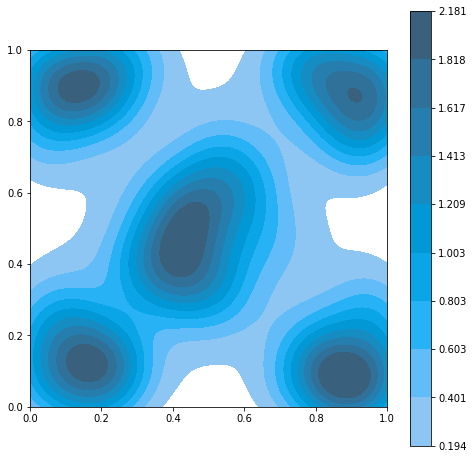

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[0], 0].flatten(), 
    y=xs[queries[0], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');

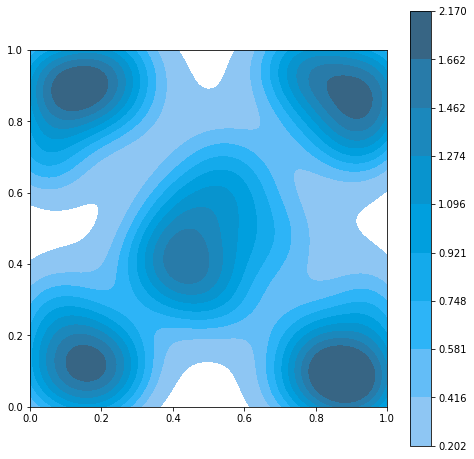

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.kdeplot(
    x=xs[queries[1], 0].flatten(), 
    y=xs[queries[1], 1].flatten(), 
    cbar=True, fill=True, ax=ax
)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_aspect('equal', 'box');